In [25]:
from __future__ import division, print_function, absolute_import
from past.builtins import basestring  #noqa

import matplotlib
get_ipython().magic(u'matplotlib inline')
from matplotlib import pyplot as plt
from IPython.display import display, HTML 

import os
from decimal import Decimal
from traceback import print_exc

import pandas as pd

# you really want to be efficient about RAM, so user iter and itertools
# from itertools import izip
from twip.constant import DATA_PATH
from pugnlp.util import dict2obj

display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1200)

In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from pugnlp.segmentation import generate_sentences_from_files

nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/hobs/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### First we need to break up my rambling journal into sentences

In [10]:

df = pd.DataFrame.from_records(generate_sentences_from_files('/home/hobs/Dropbox/notes/journal', ['md', 'txt']))
df.to_csv('/home/hobs/Dropbox/notes/journal/sentences.csv.gz')
df.size = df.size.astype(int)
df.len = df.sentence.str.len().astype(int)
df.words = df.sentence.str.split()
df.num_words = pd.Series([len(list(x)) for x in df.words], index=df.words.index)
df.index = pd.DatetimeIndex(df.modified.values)

SKIPPING: /home/hobs/Dropbox/notes/journal/letter to mom and sister 2012.txt
SKIPPING: /home/hobs/Dropbox/notes/journal/skype_message_log_nov2011.txt
SKIPPING: /home/hobs/Dropbox/notes/journal/passwords/stuff_p_all.txt
SKIPPING: /home/hobs/Dropbox/notes/journal/old notes, duplicated in boat blog/boatnotes.txt
SKIPPING: /home/hobs/Dropbox/notes/journal/old notes, duplicated in boat blog/rigging.txt
SKIPPING: /home/hobs/Dropbox/notes/journal/old notes, duplicated in boat blog/notes, boat blog.txt
SKIPPING: /home/hobs/Dropbox/notes/journal/OldVersions of contacts and PDA notes/stuff_p_other.txt
SKIPPING: /home/hobs/Dropbox/notes/journal/android documentation/Idea Knowt Android Software database design.txt
SKIPPING: /home/hobs/Dropbox/notes/journal/misc/memopad from palm.txt


In [13]:
df.sort(inplace=True)
df

/home/hobs/.virtualenvs/twip3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


,accessed,created,dir,mode,modified,name,path,sentence,size,type,compound,neg,neu,pos
2012-05-13 15:10:40,2016-09-18 23:28:37.888914,2016-04-16 17:18:48.853001,/home/hobs/Dropbox/notes/journal,33204,2012-05-13 15:10:40,"2012-04-19, example annoying negotiation dialo...","/home/hobs/Dropbox/notes/journal/2012-04-19, e...","And that's what I charged obsession, though I ...",62380,file,0.7717,0.120,0.598,0.282
2012-05-13 15:10:40,2016-09-18 23:28:37.888914,2016-04-16 17:18:48.853001,/home/hobs/Dropbox/notes/journal,33204,2012-05-13 15:10:40,"2012-04-19, example annoying negotiation dialo...","/home/hobs/Dropbox/notes/journal/2012-04-19, e...","Les came by 3 tim3s this past few days, bangin...",62380,file,-0.4019,0.101,0.899,0.000
2012-05-13 15:10:40,2016-09-18 23:28:37.888914,2016-04-16 17:18:48.853001,/home/hobs/Dropbox/notes/journal,33204,2012-05-13 15:10:40,"2012-04-19, example annoying negotiation dialo...","/home/hobs/Dropbox/notes/journal/2012-04-19, e...",Lots of disjointed memories below.\n\nWhen are...,62380,file,-0.2500,0.071,0.890,0.040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-06 12:28:39,2016-09-18 21:11:05.245009,2016-09-18 21:01:28.869871,/home/hobs/Dropbox/notes/journal/journal_2016,33204,2016-08-06 12:28:39,2016-08-07 Peruvian Salsa Recipe.md,/home/hobs/Dropbox/notes/journal/journal_2016/...,"In Peru, it's also used as a sauce for beef, p...",62380,file,0.0000,0.000,1.000,0.000
2016-08-06 12:28:39,2016-09-18 21:04:07.984622,2016-09-18 21:01:28.869871,/home/hobs/Dropbox/notes/journal/journal_2016,33204,2016-08-06 12:28:39,2016-07-27 Idea.md,/home/hobs/Dropbox/notes/journal/journal_2016/...,# 2016-07-27 Idea\n\n- generate git commit mes...,62380,file,0.8910,0.000,0.855,0.145
2016-08-06 12:28:39,2016-09-18 21:11:05.245009,2016-09-18 21:01:28.869871,/home/hobs/Dropbox/notes/journal/journal_2016,33204,2016-08-06 12:28:39,2016-08-07 Peruvian Salsa Recipe.md,/home/hobs/Dropbox/notes/journal/journal_2016/...,Sometimes mayonnaise or iceberg lettuce is ble...,62380,file,0.0000,0.000,1.000,0.000


### Now let's analyze the sentiment of all those sentences

In [12]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(df.sentence.iloc[0])
sentiment = pd.DataFrame([sia.polarity_scores(s) for s in df.sentence], index=df.sentence.index)
df = pd.concat((df, sentiment), axis=1)
df.created = pd.datetools.parse_time_string(df.created)
df.modified = pd.datetools.parse_time_string(df.modified)
df.index = pd.DatetimeIndex(df.modified)
df.to_csv('/home/hobs/Dropbox/notes/journal/journal_sentiment_dated.csv.gz')

In [21]:
df.neg = -df.neg
df[['name', 'sentence', 'pos', 'neu', 'neg']]

,name,sentence,pos,neu,neg
2012-05-13 15:10:40,"2012-04-19, example annoying negotiation dialo...","And that's what I charged obsession, though I ...",0.282,0.598,-0.120
2012-05-13 15:10:40,"2012-04-19, example annoying negotiation dialo...","Les came by 3 tim3s this past few days, bangin...",0.000,0.899,-0.101
2012-05-13 15:10:40,"2012-04-19, example annoying negotiation dialo...",Lots of disjointed memories below.\n\nWhen are...,0.040,0.890,-0.071
...,...,...,...,...,...
2016-08-06 12:28:39,2016-08-07 Peruvian Salsa Recipe.md,"In Peru, it's also used as a sauce for beef, p...",0.000,1.000,-0.000
2016-08-06 12:28:39,2016-07-27 Idea.md,# 2016-07-27 Idea\n\n- generate git commit mes...,0.145,0.855,-0.000
2016-08-06 12:28:39,2016-08-07 Peruvian Salsa Recipe.md,Sometimes mayonnaise or iceberg lettuce is ble...,0.000,1.000,-0.000


### Any Trends?

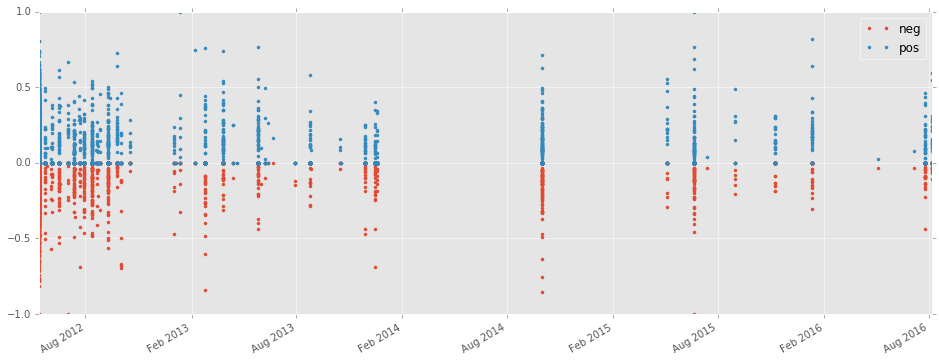

In [29]:
df[['neg', 'pos']].plot(style='.')

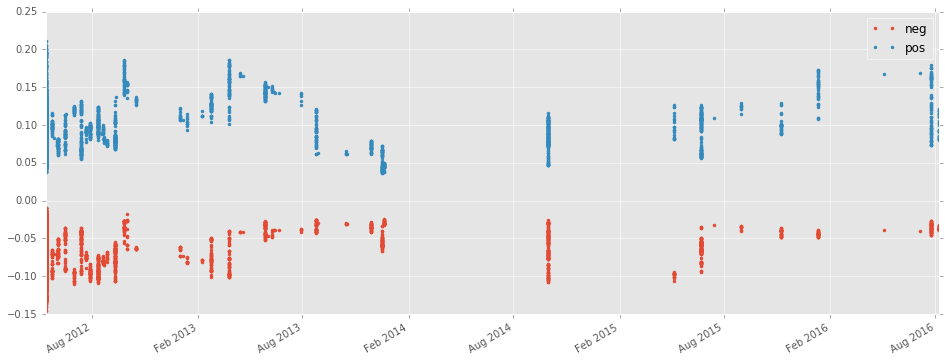

In [33]:
df[['neg', 'pos']].rolling(window=60, win_type='boxcar').mean().plot(style='.')